In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#display all columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('imdb_movies_shows.csv')

In [3]:
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [4]:
df.isnull().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


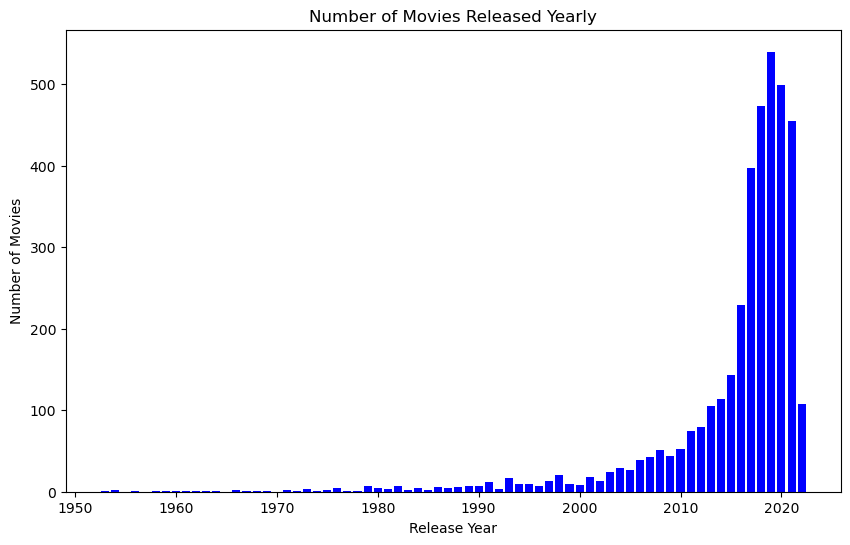

In [6]:
import matplotlib.pyplot as plt

# Filter out the movies
movies = df[df['type'] == 'MOVIE']

# Group by 'release_year' and count the number of movies for each year
yearly_movies = movies['release_year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(yearly_movies.index, yearly_movies.values, color='blue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Yearly')
plt.show()


In [7]:
# df['genres'] = df['genres'].astype(str)
# df['genres'] = df['genres'].str.strip('[]').str.split(',')


In [8]:
# Assuming 'df' is your DataFrame and 'genres' is the column you want to count values from
unique_values = df['genres'].value_counts()
print(unique_values)

genres
['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: count, Length: 1626, dtype: int64


In [9]:
# Ensure 'genres' column contains strings
df['genres'] = df['genres'].astype(str)

# Split the genres
split_genres = df['genres'].str.strip('[]').str.split(', ', expand=True)

# Print the result
print(split_genres)


                    0                1            2     3     4     5     6  \
0     'documentation'             None         None  None  None  None  None   
1             'crime'          'drama'         None  None  None  None  None   
2            'comedy'        'fantasy'         None  None  None  None  None   
3            'comedy'             None         None  None  None  None  None   
4            'horror'             None         None  None  None  None  None   
...               ...              ...          ...   ...   ...   ...   ...   
5801        'romance'          'drama'         None  None  None  None  None   
5802          'music'  'documentation'         None  None  None  None  None   
5803         'family'          'drama'         None  None  None  None  None   
5804         'action'       'thriller'         None  None  None  None  None   
5805         'family'         'comedy'  'animation'  None  None  None  None   

         7     8  
0     None  None  
1     None  N

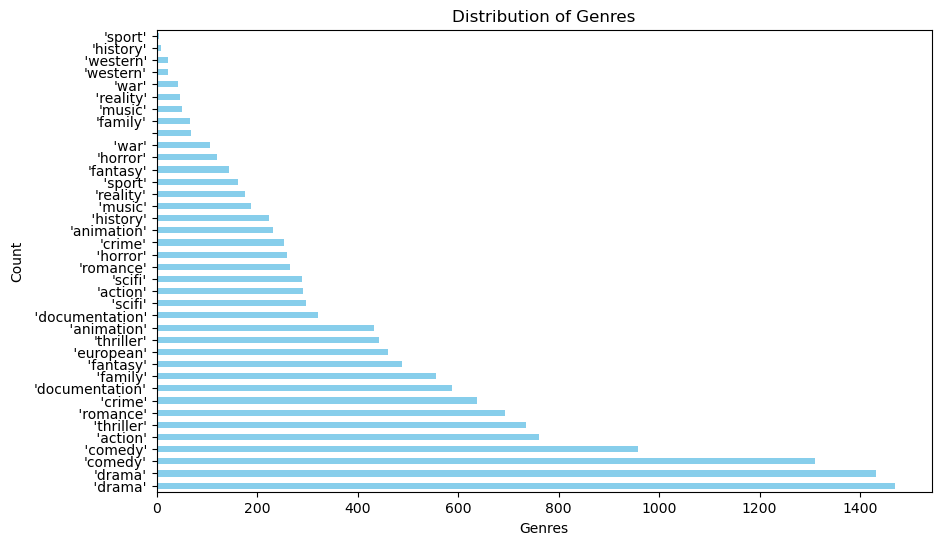

NameError: name 'valuecounts' is not defined

In [10]:
# Assuming 'genres is a string representation of a list, convert it to on actual list

df['genres'] = df['genres'].str.strip('[]').str.split(',')
#FLatten the List of gennes

   
all_genres = [genre for genres_list in df['genres'] for genre in genres_list]
   
   
#Count the ccurrences of each genne
   
genre_counts = pd.Series(all_genres).value_counts()

#Plot the bar chart

plt.figure(figsize = (10, 6))
genre_counts.plot(kind = 'barh', color= 'skyblue')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()
valuecounts()

In [11]:
df.isnull().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [12]:
# Reformat the generes columns so they are seperated by commas

# Task to do on the Data set today:
1. Change genres and country features to be commma seprated values.
2. Formart countris values to be chaarters
3. Change the [] values in genres and production_countries to "NO_GENRE" and "NO_COUNTRY"
4. Check the movie without the title.
5. Drop movies without imbd_id

6.group movie by type

7. TV-MA, R, NC-17 = Adult.

8.PG

9.TV-14, G, PG-13, TV-PG, TV-Y, TV-G, TV-Y7.

9.NaN = Others

In [13]:
# df['genres'] = df['genres'].apply(lambda x: ', '.join(x))
# df

In [14]:
"['crime', 'drama']".strip("[]").replace("'", "").replace(", ", ",")

'crime,drama'

In [15]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [16]:
def clean_list(input_list):
   return input_list.strip("[]").replace("''", "").replace(", ", "")

df['production_countries'] = df['production_countries'].apply(clean_list)


In [55]:
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_rating
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",'US',NaN,tt0075314,8.3,795222.0,Adult
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",'GB',NaN,tt0071853,8.2,530877.0,Requires Supervision
3,Life of Brian,MOVIE,1979,R,94,['comedy'],'GB',NaN,tt0079470,8.0,392419.0,Adult
4,The Exorcist,MOVIE,1973,R,133,['horror'],'US',NaN,tt0070047,8.1,391942.0,Adult
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",'GB',4.0,tt0063929,8.8,72895.0,Requires Supervision
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,Momshies! Your Soul is Mine,MOVIE,2021,NaN,108,['comedy'],'PH',NaN,tt14412240,5.8,26.0,Not Rated
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",'NG',NaN,tt13857480,6.9,39.0,Not Rated
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']",'NG''CA',NaN,tt14620732,6.5,32.0,Not Rated
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",,NaN,tt10168094,6.2,9.0,Not Rated


In [57]:
df['genres'] = df['genres'].apply(lambda x: ', '.join(x))


In [58]:
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_rating
1,Taxi Driver,MOVIE,1976,R,113,"'crime', 'drama'",'US',NaN,tt0075314,8.3,795222.0,Adult
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"'comedy', 'fantasy'",'GB',NaN,tt0071853,8.2,530877.0,Requires Supervision
3,Life of Brian,MOVIE,1979,R,94,'comedy','GB',NaN,tt0079470,8.0,392419.0,Adult
4,The Exorcist,MOVIE,1973,R,133,'horror','US',NaN,tt0070047,8.1,391942.0,Adult
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"'comedy', 'european'",'GB',4.0,tt0063929,8.8,72895.0,Requires Supervision
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,Momshies! Your Soul is Mine,MOVIE,2021,NaN,108,'comedy','PH',NaN,tt14412240,5.8,26.0,Not Rated
5801,Fine Wine,MOVIE,2021,NaN,100,"'romance', 'drama'",'NG',NaN,tt13857480,6.9,39.0,Not Rated
5803,Clash,MOVIE,2021,NaN,88,"'family', 'drama'",'NG''CA',NaN,tt14620732,6.5,32.0,Not Rated
5804,Shadow Parties,MOVIE,2021,NaN,116,"'action', 'thriller'",,NaN,tt10168094,6.2,9.0,Not Rated


In [59]:
df.age_certification.unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [60]:
df.type.unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [61]:
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_rating
1,Taxi Driver,MOVIE,1976,R,113,"'crime', 'drama'",'US',NaN,tt0075314,8.3,795222.0,Adult
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"'comedy', 'fantasy'",'GB',NaN,tt0071853,8.2,530877.0,Requires Supervision
3,Life of Brian,MOVIE,1979,R,94,'comedy','GB',NaN,tt0079470,8.0,392419.0,Adult
4,The Exorcist,MOVIE,1973,R,133,'horror','US',NaN,tt0070047,8.1,391942.0,Adult
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"'comedy', 'european'",'GB',4.0,tt0063929,8.8,72895.0,Requires Supervision
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,Momshies! Your Soul is Mine,MOVIE,2021,NaN,108,'comedy','PH',NaN,tt14412240,5.8,26.0,Not Rated
5801,Fine Wine,MOVIE,2021,NaN,100,"'romance', 'drama'",'NG',NaN,tt13857480,6.9,39.0,Not Rated
5803,Clash,MOVIE,2021,NaN,88,"'family', 'drama'",'NG''CA',NaN,tt14620732,6.5,32.0,Not Rated
5804,Shadow Parties,MOVIE,2021,NaN,116,"'action', 'thriller'",,NaN,tt10168094,6.2,9.0,Not Rated


In [62]:
blank_genre_mask = df["genres"] == "[]"
df.loc[blank_genre_mask, "genres"] = "NO_GENRE"

In [63]:
df.genres.sample(50)

1594                    'thriller',  'drama',  'european'
4643                                 'drama',  'thriller'
11                             'war',  'action',  'drama'
4309                       'comedy',  'family',  'action'
945                          'drama',  'comedy',  'crime'
1281                      'comedy',  'romance',  'action'
3649                                              'drama'
2900                                             'comedy'
1418                                              'drama'
801                                             'reality'
3738                                             'comedy'
1167                              'animation',  'fantasy'
1611                                             'comedy'
1927                                   'drama',  'comedy'
1329            'action',  'drama',  'thriller',  'crime'
819                                              'family'
1260                       'drama',  'thriller',  'crime'
3176          

In [64]:
#Find the observation with the Lebanon and replace it with LB

In [65]:
df.production_countries.value_counts()

production_countries
'US'                        1825
'IN'                         575
'JP'                         246
'GB'                         204
                             188
                            ... 
'IT''CH''FR'                   1
'HK''IS''US'                   1
'GB''US''SG'                   1
'SG''US''GB''ID''CA''CN'       1
'NG''CA'                       1
Name: count, Length: 426, dtype: int64

In [66]:
df.production_countries.unique()

array(["'US'", "'GB'", "'US''GB'", "'JP'", "'EG'", "'DE'", "'IN'", '',
       "'DZ''EG'", "'LB'", "'FR''LB''CA'", "'IN''SU'", "'US''IT'",
       "'HK''US'", "'GB''US'", "'AR'", "'KW'", "'EG''FR'", "'FR''LB'",
       "'US''JP'", "'US''CA'", "'DE''US'", "'US''DE'", "'CA''US'",
       "'US''FR'", "'PE''US''BR'", "'IT''US''FR'", "'US''HK'",
       "'FR''IE''GB''DE'", "'GH''GB''US''BF''DE'", "'AR''ES'", "'FR'",
       "'MX'", "'AU'", "'BE''FR''NO''LB'", "'IT''LB''BE''FR'",
       "'US''FR''DE''PS'", "'CA'", "'GB''US''BS''CZ''DE'", "'GB''US''AU'",
       "'DE''ES''US''FR'", "'GB''US''AU''DE'", "'JP''US'", "'US''IS''GB'",
       "'DK'", "'NZ''JP''US'", "'US''CA''FR'", "'GB''US''DE'",
       "'US''DE''IT''GB'", "'CA''DE''US'", "'HK''CN'", "'IT''US'",
       "'FR''JP''US'", "'US''BE'", "'KR'", "'IT'", "'US''AU'", "'ES''GB'",
       "'CN''HK'", "'RU'", "'CN'", "'SG'", "'GB''US''CA'", "'HK''JP'",
       "'CA''GB''US'", "'ES''FR''MX'", "'CO'", "'IN''CA''US'",
       "'PS''FR''MA''DE'", "'HK'", "'D

In [67]:
df.iloc[651]

title                        Bheem vs Aliens
type                                   MOVIE
release_year                            2010
age_certification                          G
runtime                                   69
genres                           'animation'
production_countries                        
seasons                                  NaN
imdb_id                            tt6442436
imdb_score                               7.7
imdb_votes                              35.0
age_group_rating        Requires Supervision
Name: 687, dtype: object

In [68]:
df[df.production_countries.str.contains("Leb")]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_rating


In [69]:
leb_mask = df.production_countries.str.contains("Leb")

new_lb_values = df[leb_mask]["production_countries"].str.replace('Lebanon', 'LB')

df.loc[leb_mask, "production_countries"] = new_lb_values

In [70]:
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_rating
1,Taxi Driver,MOVIE,1976,R,113,"'crime', 'drama'",'US',NaN,tt0075314,8.3,795222.0,Adult
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"'comedy', 'fantasy'",'GB',NaN,tt0071853,8.2,530877.0,Requires Supervision
3,Life of Brian,MOVIE,1979,R,94,'comedy','GB',NaN,tt0079470,8.0,392419.0,Adult
4,The Exorcist,MOVIE,1973,R,133,'horror','US',NaN,tt0070047,8.1,391942.0,Adult
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"'comedy', 'european'",'GB',4.0,tt0063929,8.8,72895.0,Requires Supervision
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,Momshies! Your Soul is Mine,MOVIE,2021,NaN,108,'comedy','PH',NaN,tt14412240,5.8,26.0,Not Rated
5801,Fine Wine,MOVIE,2021,NaN,100,"'romance', 'drama'",'NG',NaN,tt13857480,6.9,39.0,Not Rated
5803,Clash,MOVIE,2021,NaN,88,"'family', 'drama'",'NG''CA',NaN,tt14620732,6.5,32.0,Not Rated
5804,Shadow Parties,MOVIE,2021,NaN,116,"'action', 'thriller'",,NaN,tt10168094,6.2,9.0,Not Rated


In [71]:
# df.title.value_counts()
df['title']

1                              Taxi Driver
2          Monty Python and the Holy Grail
3                            Life of Brian
4                             The Exorcist
5             Monty Python's Flying Circus
                       ...                
5800           Momshies! Your Soul is Mine
5801                             Fine Wine
5803                                 Clash
5804                        Shadow Parties
5805    Mighty Little Bheem: Kite Festival
Name: title, Length: 5361, dtype: object

In [72]:
leb_title = df.title.str.contains("")

In [73]:
leb_title

1       True
2       True
3       True
4       True
5       True
        ... 
5800    True
5801    True
5803    True
5804    True
5805    True
Name: title, Length: 5361, dtype: bool

In [74]:
df['title'].isnull().sum()

0

In [75]:
df.iloc[649]

title                              A Very Special Love
type                                             MOVIE
release_year                                      2008
age_certification                                   PG
runtime                                            105
genres                  'romance',  'drama',  'comedy'
production_countries                              'PH'
seasons                                            NaN
imdb_id                                      tt1243381
imdb_score                                         6.5
imdb_votes                                       388.0
age_group_rating                  Requires Supervision
Name: 684, dtype: object

In [76]:
df[df["title"].isnull()]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_rating


In [77]:
#Drop the element without title

df = df.dropna(subset=['title'])


In [78]:
df[df["title"].isnull()]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_rating


In [79]:
 df[df["imdb_id"].isnull()].count()

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
age_group_rating        0
dtype: int64

In [80]:
#Drop the element without title

df = df.dropna(subset=['imdb_id'])


In [81]:
 df[df["imdb_id"].isnull()].count()

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
age_group_rating        0
dtype: int64

In [82]:
# Define a function the group the films base on the Age Ceritication Column:

def age_group(age_cert):
   if age_cert in ['TV-MA', 'R', 'NC-17']:
       return 'Adult'
   elif age_cert in ['PG', 'TV-14', 'G', 'PG-13', 'TV-PG']:
       return 'Requires Supervision'
   elif age_cert in ['TV-Y', 'TV-G', 'TV-Y7']:
       return 'Good For Children'
   else:
       return "Not Rated"


In [83]:
df["age_group_rating"] = df["age_certification"].apply(age_group)

In [84]:
df["age_group_rating"].value_counts()

age_group_rating
Not Rated               2331
Requires Supervision    1392
Adult                   1364
Good For Children        274
Name: count, dtype: int64

In [85]:
children_movies = df["age_group_rating"] == "Good For Children"

In [91]:
children_movies_df = df[children_movies]

In [97]:
children_movies_df[children_movies_df.genres.str.contains("animation")]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,age_group_rating
57,Thomas & Friends,SHOW,1984,TV-Y,10,"'family', 'comedy', 'music', 'action', 'an...",'GB',24.0,tt0086815,6.5,4948.0,Good For Children
66,Fireman Sam,SHOW,1987,TV-Y,10,"'comedy', 'animation', 'family', 'crime', ...",'GB',13.0,tt0329829,6.1,1759.0,Good For Children
67,Danger Mouse,SHOW,1981,TV-Y,15,"'comedy', 'family', 'scifi', 'animation', ...",'GB',10.0,tt0081848,7.4,3514.0,Good For Children
107,Pokémon,SHOW,1997,TV-Y7,22,"'scifi', 'action', 'comedy', 'fantasy', 'a...",'JP',24.0,tt0168366,7.6,172.0,Good For Children
121,The Magic School Bus,SHOW,1994,TV-Y,26,"'scifi', 'comedy', 'family', 'fantasy', 'a...",'US''CA',4.0,tt0108847,7.8,9708.0,Good For Children
...,...,...,...,...,...,...,...,...,...,...,...,...
5510,Karma's World,SHOW,2021,TV-Y,11,"'animation', 'comedy', 'family'",'US',2.0,tt13321232,6.2,134.0,Good For Children
5546,We the People,SHOW,2021,TV-Y7,5,"'family', 'music', 'animation', 'comedy'",'US',1.0,tt14770480,3.4,674.0,Good For Children
5586,The New Adventures of Oggy,SHOW,2021,TV-Y,15,"'comedy', 'family', 'action', 'animation'",'US',1.0,tt11194006,6.6,38.0,Good For Children
5604,I Heart Arlo,SHOW,2021,TV-Y7,15,"'comedy', 'family', 'animation'",'US',1.0,tt13573450,7.0,204.0,Good For Children


In [96]:
type(children_movies_df["genres"][57])

str

In [90]:
children_movies_df = df.title.str.contains("animation")

In [89]:
children_movies_df

1       False
2       False
3       False
4       False
5       False
        ...  
5800    False
5801    False
5803    False
5804    False
5805    False
Name: title, Length: 5361, dtype: bool